#  Business Analytics Project

In this project, of analytical department at Yandex.Afisha, my task to help optimize marketing expenses.
the information i have:
Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
Dump file with all orders for the period
Marketing expenses statistics
In order to optimize marketing expenses, i will investigate:
How people use the product
When they start to buy
How much money each customer brings
When they pay off.

The steps i will make are:

Step 1. Explore the data and prepare it for analysis

Step 2. Make reports and calculate metrics

Step 3. Write a conclusion: advise marketing experts how much money to invest and where.



# Preparation 

In [7]:
# Loading all the libraries i will use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import math 
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import requests 
import io
import plotly.graph_objects as go
import plotly.offline

plotly.offline.init_notebook_mode(connected=True)


In [8]:
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/Business-Analytics-Project/main/visits_log_us.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

visits = pd.read_csv(io.StringIO(download.decode('utf-8')))



visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [9]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
visits.Device.value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

As we can see, there are no missing values in the data, but I have spotted a few problems that needs adressing in the "visits" df: 
1. I want the columns names to be in lower case, that will make my analysis easier

2. I want the columns names to have an under score between them, for the same reason. 

3. the data can be optimised in terms of memory usage by cahnging the 'start ts' and 'end ts' to datetime Dtype 
   and the "device" to category Dtype.


In [15]:
# downloading the data again with the changes i wanted:
visits = pd.read_csv(io.StringIO(download.decode('utf-8'))
    ,
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)


In [16]:
visits.columns = visits.columns.str.replace(' ','_').str.lower()

In [17]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [19]:
# Downloading the costs csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/Business-Analytics-Project/main/costs_us.csv"
c_download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

costs = pd.read_csv(io.StringIO(c_download.decode('utf-8')))

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [20]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
#Converting the 'dt' column into datetime64[M] for further investigation
costs['dt'] = costs['dt'].astype('datetime64[M]')


In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [23]:
#downloading the 'orders' data frame and exploring it 

url = "https://raw.githubusercontent.com/yoav-karsenty/Business-Analytics-Project/main/orders_log_us.csv"
download_o = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

orders = pd.read_csv(io.StringIO(download_o.decode('utf-8')))

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [24]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [25]:
#Converting the 'Buy Ts' column into datetime64[M] for further investigation
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M:%S")


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [27]:
#lowering all columns names , that will make my analysis easier
orders.columns = map(str.lower, orders.columns)


In [28]:
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


# Step 2. Make reports and calculate metrics:


In the next step, i want to study and answer the next questions:
1. How many people use it every day, week, and month?
2. How many sessions are there per day? 
3. What is the length of each session?
4. What's the user retention rate?

In order to do that, i will create more datetime columns from the visits df, and use those columns to calculate the relevant metrics.

In [29]:
#creating more datetime columns from the visits df
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['ses_month'] = visits['start_ts'].astype('datetime64[M]')
visits['ses_week'] =  visits['start_ts'].astype('datetime64[W]')
visits['ses_date'] = visits['start_ts'].astype('datetime64[D]')



In [30]:
visits.head()

,device,end_ts,source_id,start_ts,uid,ses_month,ses_week,ses_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27


In [31]:
#grouping the data by date in order to calculate daily active users:
dau = visits.groupby(['ses_date'])['uid'].nunique().reset_index()
dau_total = dau.mean()



In [32]:
#Visualising the data 
fig = px.line(dau, x= 'ses_date', y = 'uid', title = 'DAU')
#adding the average dau over time as a reference line.
fig.add_hline(
                  y = dau['uid'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average DAU",
annotation_position = "top left")
fig.show()

Note : We can see a huge jump in active users on november 24 - That's probably because of black friday that acured that day.

In [33]:
#grouping the data by date in order to calculate weekly active users:
wau = visits.groupby(['ses_week'])['uid'].nunique().reset_index()
wau_total = wau.mean()

In [34]:
#Visualising the data 

wau_fig = go.Figure(layout = go.Layout(
                    title = go.layout.Title(text = "WAU")))
wau_fig.add_trace(go.Scatter(x = wau['ses_week'],
                             y = wau['uid'],
                          mode = 'lines+markers',
                          name = 'lines+markers', 
                          line = dict(color = 'purple',
                         width = 5)))
wau_fig.add_hline(
                       y = wau['uid'].mean(),
               line_dash = "dash",
              line_color = "red",
         annotation_text = "Average WAU",
     annotation_position = "top left")
wau_fig.show()

In [35]:
#grouping the data by date in order to calculate monthly active users:

mau = visits.groupby(['ses_month'])['uid'].nunique().reset_index()
mau_total = mau.mean()

In [36]:
#Visualising the data 

mau_fig = go.Figure(layout = go.Layout(
                    title = go.layout.Title(text = "MAU")))
mau_fig.add_trace(go.Scatter(x = mau['ses_month'],
                             y = mau['uid'],
                          mode = 'lines+markers',
                          name = 'lines+markers', 
                          line = dict(color = 'purple',
                         width = 5)))
mau_fig.add_hline(
                       y = mau['uid'].mean(),
               line_dash = "dash",
              line_color = "red",
         annotation_text = "Average MAU",
     annotation_position = "top left")

We can see from thw weeks and months graphs that the activity of the users is influenced by the seasons - the holiday season is very busy, probably due to the holidays but also the cold seasons - people are much more likely to spend time on the computer or other electronic devices when it is cold outside and no one wants to go out, unlike the summer where we can see a major drop in user activty.

next, i will calculate the sessions per day and the length of the sessions. 
Note: Some sessions last 0 seconds, so i will make two calculations sets, with those sessions and without them.

In [37]:
#grouping the data by date and sessions count.
sessions_per_day = visits.groupby(['ses_date'])['uid'].count().reset_index()
sessions_per_day

,ses_date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


In [38]:
#Visualising the data 

ses_fig = px.line(sessions_per_day, x= 'ses_date', y = 'uid', title = 'SPD')
ses_fig.add_hline(
                  y = sessions_per_day['uid'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day",
annotation_position = "top left")
ses_fig.show()

In [39]:
#grouping the data by device,date and sessions count.

device_ses_per_day = visits.groupby(['ses_date','device'])['uid'].count().reset_index()

device_ses_per_day

,ses_date,device,uid
0,2017-06-01,desktop,501
1,2017-06-01,touch,163
2,2017-06-02,desktop,498
3,2017-06-02,touch,160
4,2017-06-03,desktop,329
...,...,...,...
723,2018-05-29,touch,284
724,2018-05-30,desktop,989
725,2018-05-30,touch,421
726,2018-05-31,desktop,1544


In [40]:
#Visualising the data 

dev_ses_fig = px.line(device_ses_per_day, x= 'ses_date', y = 'uid',color = 'device', title = 'SPD')
dev_ses_fig.add_hline(
                  y = device_ses_per_day['uid'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day per device",
annotation_position = "top left")
dev_ses_fig.show()

In [41]:
#grouping the data by users and calculating how many the sessions per user per day 
session_user_count = visits.groupby(['ses_date'])['uid'].nunique().reset_index()
session_user_count.columns =['ses_date','users']
sessions_per_day ['sessions_per_user_per_day'] = sessions_per_day['uid'] / session_user_count['users']


In [42]:
#Visualising the data 

sessions_per_day_user_fig = px.line(sessions_per_day, x= 'ses_date', y = 'sessions_per_user_per_day', title = 'SPDPU')
sessions_per_day_user_fig.add_hline(
                  y = sessions_per_day['sessions_per_user_per_day'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day per user",
annotation_position = "top left")
sessions_per_day_user_fig.show()

In [43]:
#comparing the dynamics of sessions per day to the dynamics of DAU 
comp_fig = go.Figure(layout = go.Layout(
                    title = go.layout.Title(text = "Sessions / DAU")))
comp_fig.add_trace(go.Scatter(x = dau['ses_date'],
                              y = dau['uid'],
                           mode = 'lines',
                           name = 'DAU', line = dict(color = 'yellow',width = 2)))
comp_fig.add_trace(go.Scatter(x = sessions_per_day['ses_date'],
                         y = sessions_per_day['uid'],
                      mode = 'lines',
                      name = 'sessions', line = dict(color = 'black', width = 2)))




In [44]:
#adding a session duration column to caculate the length of the sessions by date
visits['end_ts'] =pd.to_datetime(visits['end_ts'])
visits['ses_duration'] =(visits['end_ts'] - visits['start_ts']).dt.seconds
duration = visits.groupby('ses_date')['ses_duration'].mean().reset_index()
duration

,ses_date,ses_duration
0,2017-06-01,666.320783
1,2017-06-02,619.840426
2,2017-06-03,606.958071
3,2017-06-04,554.309804
4,2017-06-05,624.450168
...,...,...
359,2018-05-27,556.964286
360,2018-05-28,632.819204
361,2018-05-29,629.428019
362,2018-05-30,640.707801


In [45]:
#Visualising the data 

d_ses_fig = px.line(duration, x= 'ses_date', y = 'ses_duration', title = 'Duration per day')
d_ses_fig.add_hline(
                  y = duration['ses_duration'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day",
annotation_position = "top left")
d_ses_fig.show()

Next, i will make the exact same actions, but with a data frame that doesnt have 0 secnds sessions. 

In [46]:
no_0_sessions  = visits[visits['ses_duration']>0]



In [47]:
n0_sessions_per_day = no_0_sessions.groupby(['ses_date'])['uid'].count().reset_index()
n0_sessions_per_day

,ses_date,uid
0,2017-06-01,599
1,2017-06-02,596
2,2017-06-03,429
3,2017-06-04,447
4,2017-06-05,807
...,...,...
359,2018-05-27,582
360,2018-05-28,1041
361,2018-05-29,942
362,2018-05-30,1265


In [48]:
n0_ses_fig = px.line(n0_sessions_per_day, x= 'ses_date', y = 'uid', title = 'SPD')
n0_ses_fig.add_hline(
                  y = n0_sessions_per_day['uid'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day",
annotation_position = "top left")
n0_ses_fig.show()

In [49]:
n0_device_ses_per_day = no_0_sessions.groupby(['ses_date','device'])['uid'].count().reset_index()

n0_device_ses_per_day

,ses_date,device,uid
0,2017-06-01,desktop,456
1,2017-06-01,touch,143
2,2017-06-02,desktop,462
3,2017-06-02,touch,134
4,2017-06-03,desktop,299
...,...,...,...
723,2018-05-29,touch,254
724,2018-05-30,desktop,899
725,2018-05-30,touch,366
726,2018-05-31,desktop,1429


In [50]:
n0_d_ses_fig = px.line(n0_device_ses_per_day, x= 'ses_date', y = 'uid',color = 'device', title = 'SPD')
n0_d_ses_fig.add_hline(
                  y = n0_device_ses_per_day['uid'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day per device",
annotation_position = "top left")
n0_d_ses_fig.show()

In [51]:
n0_session_per_user = no_0_sessions.groupby(['ses_date'])['uid'].nunique().reset_index()
n0_session_per_user.columns =['ses_date','users']
n0_sessions_per_day ['sessions_per_user_per_day'] = n0_sessions_per_day['uid'] / n0_session_per_user['users']


In [52]:
n0_sessions_per_day_user_fig = px.line(n0_sessions_per_day, x= 'ses_date', y = 'sessions_per_user_per_day', title = 'SPDPU')
n0_sessions_per_day_user_fig.add_hline(
                  y = n0_sessions_per_day['sessions_per_user_per_day'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day per user",
annotation_position = "top left")
n0_sessions_per_day_user_fig.show()

In [53]:
no_0_sessions['ses_duration'] =(no_0_sessions['end_ts'] - no_0_sessions['start_ts']).dt.seconds
n0_duration = no_0_sessions.groupby('ses_date')['ses_duration'].mean().reset_index()
n0_duration

,ses_date,ses_duration
0,2017-06-01,738.626043
1,2017-06-02,684.320470
2,2017-06-03,674.869464
3,2017-06-04,632.434004
4,2017-06-05,690.996283
...,...,...
359,2018-05-27,643.092784
360,2018-05-28,702.727185
361,2018-05-29,691.569002
362,2018-05-30,714.148617


In [54]:
n0_d_ses_fig = px.line(n0_duration, x= 'ses_date', y = 'ses_duration', title = 'Duration per day')
n0_d_ses_fig.add_hline(
                  y = n0_duration['ses_duration'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average sessions per day",
annotation_position = "top left")
n0_ses_fig.show()

Next, i want to invetgate how many users come back. in order to detrmine that, i will calculate the retention rate of the users by monthly cohorts. 

# RETENTION

In [55]:
#finding the first session for each user
min_visits = visits.groupby(['uid'])['start_ts'].min().reset_index()
min_visits.columns = (['uid','first_visit'])
min_visits


,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [56]:
#merging the min_visit table to the visits table
visits = visits.merge(min_visits,on = ['uid'])
visits.head()

,device,end_ts,source_id,start_ts,uid,ses_month,ses_week,ses_date,ses_duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00


In [57]:
# adding a “cohorts” column - il wil use this column to create cohorts based on first visit month.
#adding ‘age’ column to determine how much time has passed from the registration of the user.
visits['cohort'] = visits['first_visit'].astype('datetime64[M]')
visits['age'] =    ((pd.to_datetime(visits['ses_month']) - 
                   pd.to_datetime(visits['cohort'])) /
                   np.timedelta64(1,'M')).round().astype('int')
visits.head(10)

,device,end_ts,source_id,start_ts,uid,ses_month,ses_week,ses_date,ses_duration,first_visit,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-01,2017-10-26,2017-10-27,2520,2017-09-03 21:35:00,2017-09-01,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-04,1140,2017-09-03 21:35:00,2017-09-01,0
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-01,2017-10-26,2017-10-27,480,2017-09-03 21:35:00,2017-09-01,1


In [58]:
#creating a pivot table to calculate the number of unique users every month.
cohorts = visits.pivot_table(
                             index   = 'cohort',
                             columns = 'age',
                             values  = 'uid',
                             aggfunc = 'nunique')
cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#in order to calculate retention rate, i need to calculate the number of users divided by the number of users when cohorts age =0,
#so i will for every month (age) for every cohort
retention = cohorts.iloc[:,0:].div(cohorts[0],axis =0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


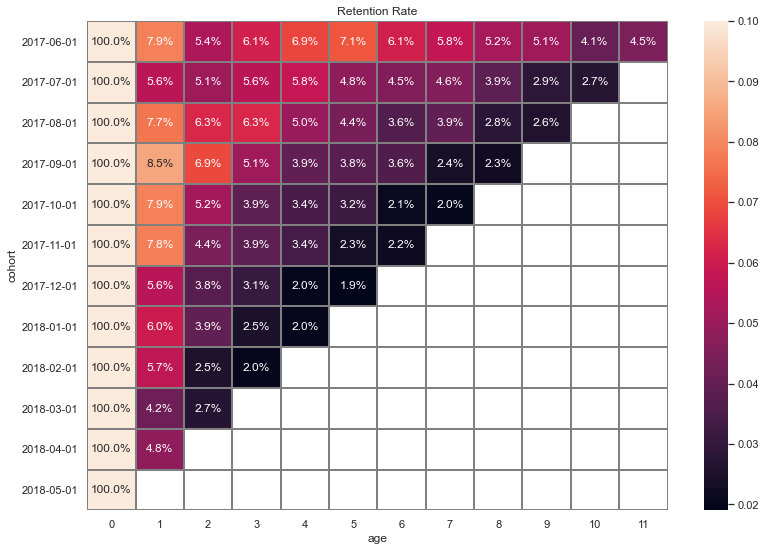

In [60]:
#Visualising the data using a heat map to see the change from month to month by cohort. 
retention.index = retention.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')

plt.title('Cohorts: User Retention')
sns.heatmap(retention, 
            annot=True, 
              fmt='.1%',
       linewidths=1, 
        linecolor='grey',vmax = 0.1).set(title = "Retention Rate") 
plt.show()
                                          

As we can see frop the retention rate heat map, the retentio rate is in a continuous drop from cohort to cohort at the same age, so i would recomend to see what changed over time and from the first cohort to the last cohort in terms of business descisions, marketing and user interface. 

Next i want to ceck if the retention rate differs from different devices. 

In [61]:
#creating a pivot table to calculate the number of unique users every month (toch users)
cohorts_by_touch  = visits[visits['device'] =='touch'].pivot_table(
                             index   = 'cohort',
                             columns = 'age',
                             values  = 'uid',
                             aggfunc = 'nunique').fillna(0)
cohorts_by_touch

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,3655.0,241.0,145.0,173.0,214.0,202.0,201.0,168.0,156.0,157.0,126.0,156.0
2017-07-01,3982.0,191.0,174.0,195.0,191.0,177.0,150.0,151.0,139.0,98.0,109.0,0.0
2017-08-01,2796.0,199.0,161.0,155.0,114.0,112.0,99.0,111.0,55.0,55.0,0.0,0.0
2017-09-01,5133.0,436.0,316.0,227.0,191.0,162.0,166.0,105.0,111.0,0.0,0.0,0.0
2017-10-01,7850.0,576.0,385.0,293.0,241.0,217.0,144.0,126.0,0.0,0.0,0.0,0.0
2017-11-01,7473.0,581.0,336.0,272.0,265.0,160.0,151.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,7100.0,473.0,273.0,237.0,143.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,7018.0,410.0,272.0,158.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,6826.0,358.0,154.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#in order to calculate retention rate, i need to calculate the number of users divided by the number of users when cohorts age =0,
#so i will for every month (age) for every cohort
#(toch users)
retention_t = cohorts_by_touch.iloc[:,0:].div(cohorts_by_touch[0],axis =0)
retention_t

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.065937,0.039672,0.047332,0.058550,0.055267,0.054993,0.045964,0.042681,0.042955,0.034473,0.042681
2017-07-01,1.0,0.047966,0.043697,0.048970,0.047966,0.044450,0.037670,0.037921,0.034907,0.024611,0.027373,0.000000
2017-08-01,1.0,0.071173,0.057582,0.055436,0.040773,0.040057,0.035408,0.039700,0.019671,0.019671,0.000000,0.000000
2017-09-01,1.0,0.084941,0.061562,0.044224,0.037210,0.031560,0.032340,0.020456,0.021625,0.000000,0.000000,0.000000
2017-10-01,1.0,0.073376,0.049045,0.037325,0.030701,0.027643,0.018344,0.016051,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.077747,0.044962,0.036398,0.035461,0.021410,0.020206,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.066620,0.038451,0.033380,0.020141,0.016901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.058421,0.038757,0.022514,0.018524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.052447,0.022561,0.020803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
#creating a pivot table to calculate the number of unique users every month(desktop users)
cohorts_by_desktop  = visits[visits['device'] =='desktop'].pivot_table(
                             index   = 'cohort',
                             columns = 'age',
                             values  = 'uid',
                             aggfunc = 'nunique').fillna(0)
cohorts_by_desktop

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,9761.0,833.0,593.0,671.0,741.0,799.0,656.0,627.0,574.0,552.0,441.0,471.0
2017-07-01,9312.0,568.0,520.0,568.0,602.0,483.0,466.0,463.0,391.0,289.0,265.0,0.0
2017-08-01,7450.0,603.0,492.0,504.0,406.0,349.0,279.0,302.0,234.0,218.0,0.0,0.0
2017-09-01,11715.0,1034.0,875.0,655.0,485.0,495.0,450.0,302.0,279.0,0.0,0.0,0.0
2017-10-01,18451.0,1530.0,1015.0,740.0,681.0,646.0,423.0,413.0,0.0,0.0,0.0,0.0
2017-11-01,20129.0,1619.0,902.0,806.0,681.0,489.0,451.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,18460.0,972.0,708.0,565.0,371.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,15809.0,982.0,638.0,413.0,337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,15586.0,937.0,418.0,312.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#in order to calculate retention rate, i need to calculate the number of users divided by the number of users when cohorts age =0,
#so i will for every month (age) for every cohort
#(desktop users)
retention_d = cohorts_by_desktop.iloc[:,0:].div(cohorts_by_desktop[0],axis =0)
retention_d

age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.085340,0.060752,0.068743,0.075914,0.081856,0.067206,0.064235,0.058805,0.056552,0.045180,0.048253
2017-07-01,1.0,0.060997,0.055842,0.060997,0.064648,0.051869,0.050043,0.049721,0.041989,0.031035,0.028458,0.000000
2017-08-01,1.0,0.080940,0.066040,0.067651,0.054497,0.046846,0.037450,0.040537,0.031409,0.029262,0.000000,0.000000
2017-09-01,1.0,0.088263,0.074691,0.055911,0.041400,0.042254,0.038412,0.025779,0.023816,0.000000,0.000000,0.000000
2017-10-01,1.0,0.082922,0.055011,0.040106,0.036909,0.035012,0.022926,0.022384,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.080431,0.044811,0.040042,0.033832,0.024293,0.022405,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.052654,0.038353,0.030607,0.020098,0.020098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.062117,0.040357,0.026124,0.021317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.060118,0.026819,0.020018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


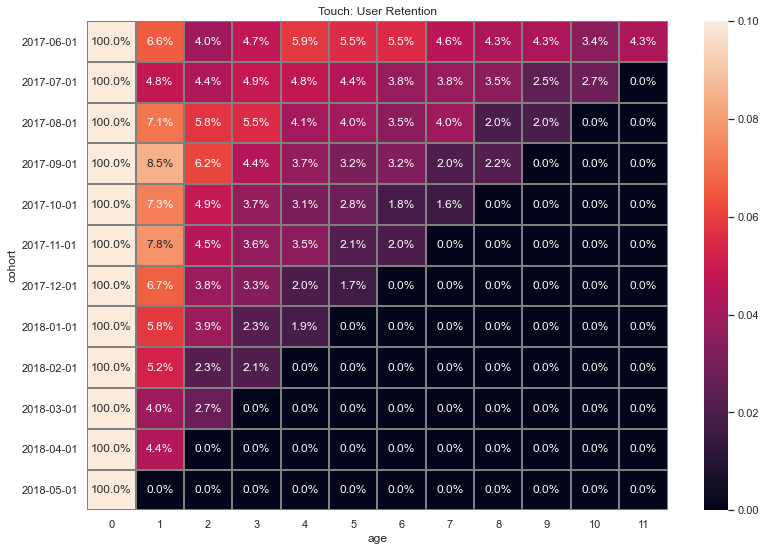

In [65]:
#(toch users)
#Visualising the data using a heat map to see the change from month to month by cohort. 


retention_t.index = retention_t.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')

plt.title('Touch: User Retention')
sns.heatmap(retention_t, 
            annot=True, 
              fmt='.1%',
       linewidths=1, 
        linecolor='grey',vmax = 0.1).set(title = "Touch: User Retention") 
plt.show()

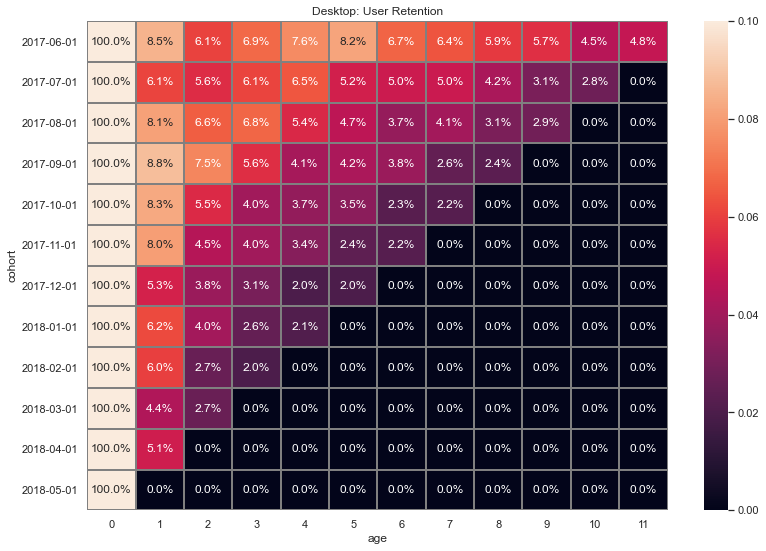

In [66]:
#Visualising the data using a heat map to see the change from month to month by cohort. (desktop users)
retention_d.index = retention_d.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')

plt.title('Desktop: User Retention')
sns.heatmap(retention_d, 
            annot=True, 
              fmt='.1%',
       linewidths=1, 
        linecolor='grey',vmax = 0.1).set(title = "Desktop: User Retention") 
plt.show()

We can see that in almost every cohort, desktop users have a better retention rate.

In the next few steps, i would like to invetigate and answer the following questions:

1. When do people start buying -How mmuch time passed between the first visit and the first purchase. 
2. How many orders do they make during a given period of time 
3. What is the average purchase size?
 

## When do people start buying 

In [67]:
#finding the time of first purchase for each user
min_orders = orders.groupby(['uid'])['buy ts'].min().reset_index()
min_orders.columns = (['uid','first_purchase_month'])

In [68]:
#merging the min_visits table with the min_orders table in order to compare the them
sales = min_visits.merge(min_orders,how = 'outer',on = ['uid'])

In [69]:
#getting the relevant data - we dont need users that did not make a purchase for our current calculations.
sales = sales[sales['first_purchase_month'].notna() == True]

In [70]:
#adding cohort and age columns, like we did in previous tasks. in this task we want to make the age number of days,
##it is more relevant to our investigation
sales['cohort'] = sales['first_visit'].astype('datetime64[M]')
sales['age'] = ((pd.to_datetime(sales['first_purchase_month']) - 
                  pd.to_datetime(sales['first_visit'])) /
                  np.timedelta64(1,'D')).round(2).astype('int')
sales.head(10)

,uid,first_visit,first_purchase_month,cohort,age
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2017-09-01,106
22,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,0
35,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-01,0
36,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2018-01-01,0
38,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,2017-11-01,0
43,3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,2018-03-01,0
52,3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,2017-08-01,36
54,3753586865891862,2018-03-03 13:47:00,2018-03-03 13:50:00,2018-03-01,0
66,4808417689019433,2018-01-09 23:10:00,2018-01-09 23:32:00,2018-01-01,0
68,4992223027560440,2018-04-04 13:54:00,2018-04-04 13:54:00,2018-04-01,0


In [71]:
#making sure our data doesnt have any errors in it - we cant have sales before first visit 
sales =sales[sales['first_purchase_month'] > sales['first_visit']]

In [72]:
sales.head()

,uid,first_visit,first_purchase_month,cohort,age
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2017-09-01,106
35,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,2017-10-01,0
36,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2018-01-01,0
43,3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,2018-03-01,0
52,3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,2017-08-01,36


In [73]:
#grouping the data by cohort and average time to make a purchase after first visit
cohorts_age = sales.groupby(['cohort'])['age'].mean().reset_index()
cohorts_age.columns = (['cohort','age'])

cohorts_age

,cohort,age
0,2017-06-01,49.824458
1,2017-07-01,43.420729
2,2017-08-01,35.178571
3,2017-09-01,26.261368
4,2017-10-01,18.108406
5,2017-11-01,16.332012
6,2017-12-01,11.327933
7,2018-01-01,8.776636
8,2018-02-01,5.611581
9,2018-03-01,3.237873


In [74]:
#Visualising the data 
cohorts_age_fig = px.line(cohorts_age, x= 'cohort', y = 'age', title = 'TIME')
#adding the average cohorts_age over time as a reference line.
cohorts_age_fig.add_hline(
                  y = cohorts_age['age'].median(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average time",
annotation_position = "top left")
cohorts_age_fig.show()



In [75]:
distribution_of_time = sales.groupby(['age'])['uid'].count().reset_index()
distribution_of_time

,age,uid
0,0,23892
1,1,1022
2,2,562
3,3,434
4,4,327
...,...,...
340,354,1
341,355,3
342,357,4
343,362,1


In [76]:
#distribution of time between the first action and the first purchase
distribution_of_time_fig = px.histogram(distribution_of_time, x= 'age', y = 'uid',nbins=40, title = 'distribution_of_time')
distribution_of_time_fig.show()

We can see from the histogram above that most of the users that will make at least one purchase will make their first one within the first ten days after their first visit

In [77]:
# Reviewer's code
sales['age'].mode()

0    0
dtype: int64

we can see that the averge time between first visit and first purchase decreases from cohort to cohort, wich is a great sign.

In [78]:
#printing the over all conversion rate 
print("overall conversion % is {:.1%} ".format(sales['uid'].nunique() / visits['uid'].nunique()) )

overall conversion % is 14.9% 


## How many orders every cohort makes during a given period of time

In [79]:
#merging the tables i need to investigate
all_sales = orders.merge(min_orders, how = 'outer', on = 'uid')
all_sales = all_sales.merge(min_visits, how = 'outer', on = 'uid')

cohorts_first_purchase = all_sales[all_sales['first_purchase_month'].notna() == True]


In [80]:
#creating a cohort column by first purchase

cohorts_first_purchase['cohort'] = cohorts_first_purchase['first_purchase_month'].astype('datetime64[M]')
cohort_size = cohorts_first_purchase.groupby('cohort').agg({"uid" : "nunique"}).reset_index()
cohort_size.columns = (['cohort','number_of_users'])

cohort_size

,cohort,number_of_users
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [81]:
all_sales.head()

,buy ts,revenue,uid,first_purchase_month,first_visit
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


In [82]:
#adding relavent columns like i did un previous tassks
all_sales['purchase_month'] = all_sales['buy ts'].astype('datetime64[M]')
all_sales['cohort'] = all_sales['first_purchase_month'].astype('datetime64[M]')
#grouping the data by cohort, purchase month and amount of orders. 
all_sales_cohort = all_sales.groupby(['cohort','purchase_month'])['buy ts'].count().reset_index()
all_sales_cohort.columns= ['cohort','purchase_month','purchases']
#merging the data with cohort_size data un order to determine the amount of  purchases per user 
all_sales_cohort = all_sales_cohort.merge(cohort_size,on = 'cohort')
#creating an age column for further calculations and visualisations.
all_sales_cohort['cohorts_age'] = ((all_sales_cohort['purchase_month'] - all_sales_cohort['cohort']) /np.timedelta64(1,'M')).round()
all_sales_cohort['purchases_per_user'] =   all_sales_cohort['purchases'] /  all_sales_cohort['number_of_users']
all_sales_cohort.head(10)                                   

,cohort,purchase_month,purchases,number_of_users,cohorts_age,purchases_per_user
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340
5,2017-06-01,2017-11-01,218,2023,5.0,0.107761
6,2017-06-01,2017-12-01,276,2023,6.0,0.136431
7,2017-06-01,2018-01-01,174,2023,7.0,0.086011
8,2017-06-01,2018-02-01,212,2023,8.0,0.104795
9,2017-06-01,2018-03-01,153,2023,9.0,0.075630


In [83]:
#creating a pivot table for further calculations and Vizualizations
all_sales_pivot = all_sales_cohort.pivot_table(
                         index = 'cohort',
                       columns = 'cohorts_age',
                        values = 'purchases',
                       aggfunc = 'sum'
)
all_sales_pivot.round(1)
all_sales_pivot

cohorts_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


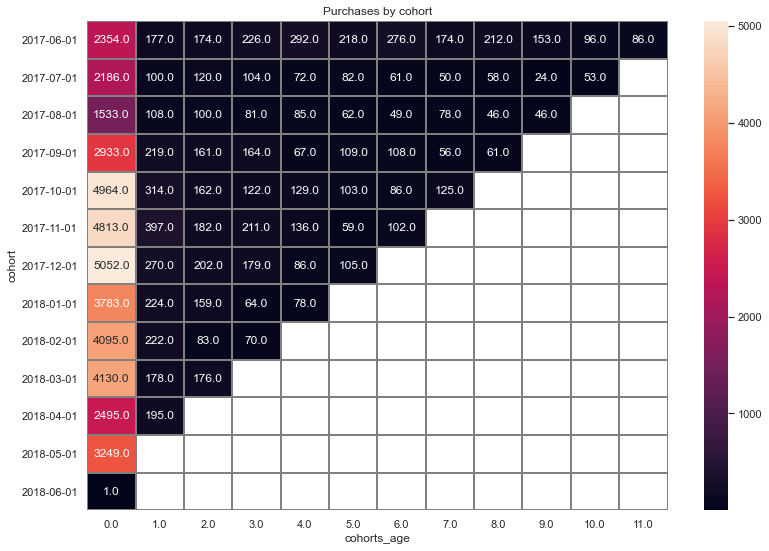

In [84]:
#Visualising the data 

all_sales_pivot.index = all_sales_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')

plt.title('all_sales_pivot')
sns.heatmap(all_sales_pivot, 
            annot=True, 
              fmt='1',
       linewidths=1, 
        linecolor='grey').set(title = "Purchases by cohort") 
plt.show()
     

We can see from the heatmap above, in all of the cohorts the first month is the one with most purchases.

In [85]:
#creating a pivot table to calculate and visualise the purchases per user per cohort/month
all_sales_cohort_pivot = all_sales_cohort.pivot_table(
                         index = 'cohort',
                       columns = 'cohorts_age',
                        values = 'purchases_per_user',
                       aggfunc = 'sum'
).cumsum(axis =1)
all_sales_cohort_pivot.round(2).fillna('')

cohorts_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


##  What is the average purchase size?


In [86]:
#average purchase size 
all_sales.revenue.sum()/all_sales.revenue.count()

4.999646930477041

In [87]:
#calculating the averge purchase size for each cohort
avg_cohort = all_sales[all_sales['first_purchase_month'].isna() == False].groupby(['cohort','purchase_month'])['revenue'].mean().reset_index()
avg_cohort
avg_cohort['cohorts_age'] =((pd.to_datetime(avg_cohort['purchase_month']) - 
                  pd.to_datetime(avg_cohort['cohort'])) /
                   np.timedelta64(1,'M')).round().astype('int')
avg_cohort.head(34)

,cohort,purchase_month,revenue,cohorts_age
0,2017-06-01,2017-06-01,4.060106,0
1,2017-06-01,2017-07-01,5.547006,1
2,2017-06-01,2017-08-01,5.088161,2
3,2017-06-01,2017-09-01,8.545575,3
4,2017-06-01,2017-10-01,7.084178,4
5,2017-06-01,2017-11-01,6.825321,5
6,2017-06-01,2017-12-01,6.966449,6
7,2017-06-01,2018-01-01,6.761839,7
8,2017-06-01,2018-02-01,5.279009,8
9,2017-06-01,2018-03-01,8.009869,9


In [88]:
avg_cohort_pivot = avg_cohort.pivot_table(
                         index = 'cohort',
                       columns = 'cohorts_age',
                        values = 'revenue',
                       aggfunc = 'mean'
)
avg_cohort_pivot.round(2).fillna('')

cohorts_age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


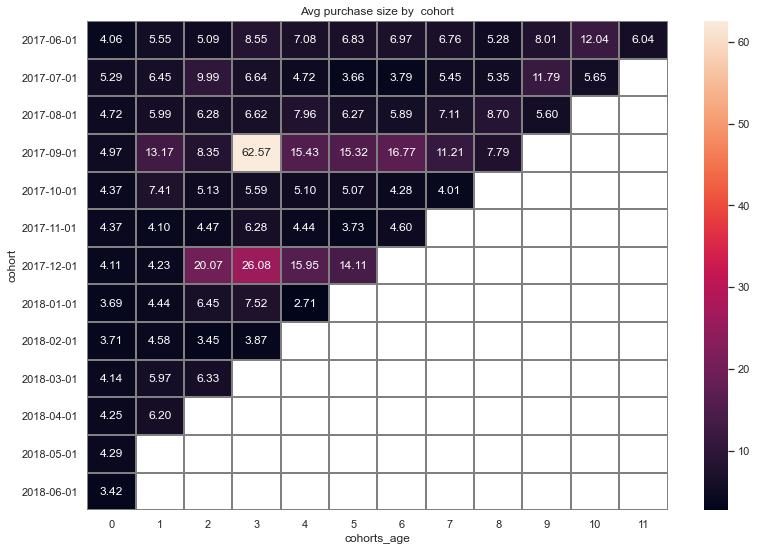

In [89]:
#Visualising the data 

avg_cohort_pivot.index = avg_cohort_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')

plt.title('avg_cohort_pivot')
sns.heatmap(avg_cohort_pivot, 
            annot=True, 
              fmt='.2f',
       linewidths=1, 
        linecolor='grey').set(title = "Avg purchase size by  cohort") 
plt.show()
     

It seems there are two cohorts with significantly high averages then others, let's see what could have caused that.

In [90]:
#creating data frame with only those cohorts
cohort2017_9_12 = all_sales[(all_sales['cohort']=="2017-09-01") | (all_sales['cohort']=="2017-12-01")]
cohort2017_9_12[cohort2017_9_12['revenue'] >300]

,buy ts,revenue,uid,first_purchase_month,first_visit,purchase_month,cohort
11723,2017-12-04 18:40:00,344.36,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11724,2017-12-05 00:50:00,402.72,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11728,2017-12-08 12:25:00,360.55,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11730,2017-12-10 13:04:00,1195.64,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11732,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11745,2017-12-15 21:22:00,604.39,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11750,2017-12-18 19:07:00,337.33,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11759,2017-12-22 19:43:00,304.94,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2017-12-01,2017-09-01
11773,2018-02-01 13:19:00,317.17,5539673724080479777,2017-09-20 19:55:00,2017-09-07 13:45:00,2018-02-01,2017-09-01
12643,2017-09-26 22:45:00,550.00,16152080406371512880,2017-09-26 22:45:00,2017-09-26 22:35:00,2017-09-01,2017-09-01


It seems that in both of these cohorts, there was a very important user aqusition with users 5539673724080479777 and 11149926373378902217. Those users made a lot of huge orders comparing to other users. 

## How much money every cohort  brings? (LTV)

In [91]:
all_sales.head()

,buy ts,revenue,uid,first_purchase_month,first_visit,purchase_month,cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [92]:
#creating an ltv df with the relevant columns from all_sales 
ltv_cohort = all_sales.groupby(['cohort','purchase_month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['cohort','purchase_month','revenue']
#merging the data with cohort size df in order to calculate the ltv
ltv_cohort = ltv_cohort.merge(cohort_size,on =['cohort'])
ltv_cohort['cohorts_age'] = ((ltv_cohort['purchase_month'] - ltv_cohort['cohort']) /np.timedelta64(1,'M')).round()
ltv_cohort['ltv'] = ltv_cohort['revenue'] / ltv_cohort['number_of_users']
ltv_cohort

,cohort,purchase_month,revenue,number_of_users,cohorts_age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


In [93]:
#making further calculations using a pivot table
ltv_cohort_pivot = ltv_cohort.pivot_table(
    index='cohort', columns='cohorts_age', values='ltv', aggfunc='sum'
).cumsum(axis = 1)

ltv_cohort_pivot

cohorts_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


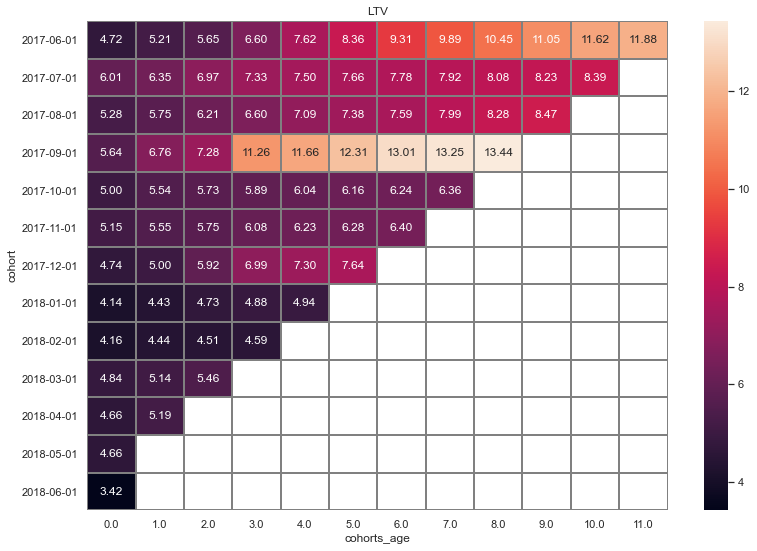

In [94]:
#Visualising the data 

ltv_cohort_pivot.index = ltv_cohort_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.set(style='white')
plt.title('Cohorts: ltv')
sns.heatmap(ltv_cohort_pivot, 
            annot=True, 
              fmt='0.2f',
       linewidths=1, 
        linecolor='grey').set(title = "LTV") 
plt.show()

                                  


# Marketing

In the next part of the project, i will focus on marketing, and try and answer the following questions:

1. How much money was spent on marketing 
1. How much did customer acquisition from each of the sources cost
3. How worthwhile where the investments (ROI)


## How much money was spent

In [95]:
#sorting the 'costs' dataframe for further visualization
costs = costs.sort_values(by = ['dt','source_id'])
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-01,62.25
2,1,2017-06-01,36.53
3,1,2017-06-01,55.00
4,1,2017-06-01,57.08


In [96]:
print('Total marketing costs are {}'.format(costs['costs'].sum()))

Total marketing costs are 329131.62


In [97]:
# a plot with cost for all sources together
all_costs = costs.groupby(['dt'])['costs'].sum().reset_index()
all_costs_fig = px.line(all_costs, x= 'dt', y = 'costs',title = 'COSTS OVER TIME',width=1000, height=1000)
all_costs_fig.show()

In [98]:
# grouping the costs df by sources 
marketing_by_month_source = costs.groupby(['dt','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.columns = ['cost_month','source','costs']

marketing_by_month_source.head(12)

,cost_month,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [99]:
##Visualising the data 
costs_fig = px.line(marketing_by_month_source, x= 'cost_month', y = 'costs',color = 'source',title = 'COSTS OVER TIME',width=2000, height=900)

costs_fig.add_hline(
                  y = marketing_by_month_source['costs'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average cost",
annotation_position = "top left")
costs_fig.show()

We can see that source 3 was the most expensive one by far, i will later show if that investmaent paid off.

In [100]:
#on the next few steps i will make calculations in irder to determine the cost of aquisition of each costumar (CAC)
#grouping the costs df by months
marketing_by_month = costs.groupby(['dt'])['costs'].sum().reset_index()
marketing_by_month.columns = ['cost_month','costs']

marketing_by_month.head(15)

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [101]:
#grouping the all_sales df by cohorts and unique users
buyers_per_month = all_sales.groupby(['cohort'])['uid'].nunique().reset_index()
buyers_per_month.columns = ['cost_month','buyers']
buyers_per_month.head(15)

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [102]:
#nerging the marketing_by_month df with the buyers_per_month in order to determine CAC
cac_per_month = marketing_by_month.merge(buyers_per_month, on = ['cost_month'])
cac_per_month['cac'] = cac_per_month['costs'] / cac_per_month['buyers']
cac_per_month

,cost_month,costs,buyers,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


In [103]:
#Visualising the data 

cac_per_month_fig = px.line(cac_per_month, x= 'cost_month', y = 'cac',title = 'Customer Acquisition Cost')
#adding the average dau over time as a reference line.
cac_per_month_fig.add_hline(
                  y = cac_per_month['cac'].mean(),
          line_dash = "dash",
         line_color = "purple",
    annotation_text = "Average cac",
annotation_position = "top left")
cac_per_month_fig.show()

In [104]:
#in order to detrmine cac per source, i need to check if a user can have moer than one source listed
cac_per_source_check = visits.groupby(['uid'])['source_id'].nunique().reset_index().query('source_id >1')
cac_per_source_check

,uid,source_id
16,1260655184775459,2
37,2471247936243530,2
40,2892676062023446,3
52,3605148382144603,3
65,4735760515861892,2
...,...,...
228143,18445407535914413204,2
228146,18445456946869452085,3
228148,18445601152732270159,2
228154,18445884613277162497,3


In [105]:
visits[visits['uid'] == 1260655184775459]

,device,end_ts,source_id,start_ts,uid,ses_month,ses_week,ses_date,ses_duration,first_visit,cohort,age
136058,desktop,2017-11-29 13:28:00,3,2017-11-29 12:49:00,1260655184775459,2017-11-01,2017-11-23,2017-11-29,2340,2017-10-23 14:14:00,2017-10-01,1
136059,desktop,2018-03-02 14:02:00,3,2018-03-02 13:38:00,1260655184775459,2018-03-01,2018-03-01,2018-03-02,1440,2017-10-23 14:14:00,2017-10-01,5
136060,desktop,2017-10-23 15:37:00,1,2017-10-23 15:17:00,1260655184775459,2017-10-01,2017-10-19,2017-10-23,1200,2017-10-23 14:14:00,2017-10-01,0
136061,desktop,2017-10-23 14:16:00,3,2017-10-23 14:14:00,1260655184775459,2017-10-01,2017-10-19,2017-10-23,120,2017-10-23 14:14:00,2017-10-01,0


The answer is yes, so i need to find the first source for each user.

In [106]:
first_source = visits.sort_values('ses_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns = ['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [107]:
#merging the all_sales with first source for further calculations
all_sales = all_sales.merge(first_source,on = 'uid',how = 'left')
all_sales.sample(10)

,buy ts,revenue,uid,first_purchase_month,first_visit,purchase_month,cohort,first_source
39867,2018-02-28 09:55:00,2.44,6487211807544032419,2018-02-28 09:55:00,2018-02-28 09:50:00,2018-02-01,2018-02-01,5
104998,NaT,NaN,5254273990506130475,NaT,2017-09-26 16:14:00,NaT,NaT,4
23899,2017-11-25 09:35:00,0.89,14666974099281768463,2017-11-25 09:35:00,2017-11-22 22:26:00,2017-11-01,2017-11-01,3
193176,NaT,NaN,13742957989448659456,NaT,2018-01-14 17:43:00,NaT,NaT,10
241823,NaT,NaN,18422318907865286981,NaT,2018-04-19 10:30:00,NaT,NaT,4
146159,NaT,NaN,9212030466620343494,NaT,2018-03-19 18:23:00,NaT,NaT,4
98978,NaT,NaN,4676573202799090315,NaT,2017-07-05 14:00:00,NaT,NaT,3
208280,NaT,NaN,15192021607545414856,NaT,2017-12-04 11:42:00,NaT,NaT,3
149980,NaT,NaN,9586604812716306636,NaT,2017-10-27 17:57:00,NaT,NaT,3
79007,NaT,NaN,2751440150643060045,NaT,2017-09-22 19:36:00,NaT,NaT,3


In [108]:
#grouping the costs df by cohort and source
marketing_by_month_source = costs.groupby(['dt','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.columns = ['cost_month','source','costs']

marketing_by_month_source.head(12)


,cost_month,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [109]:
#grouping the all_sales df by cohort and source 
buyers_per_month_source = all_sales.groupby(['cohort','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['cost_month','source','buyers']
buyers_per_month_source.tail(12)


,cost_month,source,buyers
74,2018-04-01,4,672
75,2018-04-01,5,443
76,2018-04-01,9,41
77,2018-04-01,10,104
78,2018-05-01,1,278
79,2018-05-01,2,409
80,2018-05-01,3,824
81,2018-05-01,4,788
82,2018-05-01,5,500
83,2018-05-01,9,58


In [110]:
#merging the dfs and calculating CAC per source
cac_per_month_source = marketing_by_month_source.merge(buyers_per_month_source,how = 'left',on = ['cost_month','source'])
cac_per_month_source['cac'] = cac_per_month_source['costs'] /cac_per_month_source['buyers']
cac_per_month_source.head()

,cost_month,source,costs,buyers,cac
0,2017-06-01,1,1125.61,218,5.163349
1,2017-06-01,2,2427.38,236,10.285508
2,2017-06-01,3,7731.65,618,12.510761
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,390,6.708000


In [111]:
cac_per_month_source['source'].value_counts()

1     12
2     12
3     12
4     12
5     12
9     12
10    12
Name: source, dtype: int64

In [112]:
#Visualising the data 

cac_per_month_source_fig = px.line(cac_per_month_source, x= 'cost_month', y = 'cac',color = 'source',title = 'CAC PER SOURCE',render_mode="SVG")
cac_per_month_source_fig.show()


we can see that the cost of aquisition of users via sources 2 and 3 is significantly higher than other sources, but we still dont know the quality of the users they bring (how much money do they bring? what is the return of investment?)
I will make further investigations and find out the return of marketing investment per source.

In [113]:
ltv_cohort.head()

,cohort,purchase_month,revenue,number_of_users,cohorts_age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531


In [114]:
#creating ltv by source for later calculations and visualisations
ltv_by_source_cohort  = all_sales.groupby(['cohort','purchase_month','first_source'])['revenue'].sum().reset_index()
ltv_by_source_cohort.columns = ['cohort','purchase_month','source','revenue']
#merging the data with cohort size df in order to calculate the ltv
ltv_by_source_cohort = ltv_by_source_cohort.merge(cohort_size,on =['cohort'])
ltv_by_source_cohort['cohorts_age'] = ((ltv_by_source_cohort['purchase_month'] - ltv_by_source_cohort['cohort']) /np.timedelta64(1,'M')).round()
ltv_by_source_cohort['ltv'] = ltv_by_source_cohort['revenue'] / ltv_by_source_cohort['number_of_users']
ltv_by_source_cohort.head(20)

,cohort,purchase_month,source,revenue,number_of_users,cohorts_age,ltv
0,2017-06-01,2017-06-01,1,1476.75,2023,0.0,0.729980
1,2017-06-01,2017-06-01,2,1506.65,2023,0.0,0.744760
2,2017-06-01,2017-06-01,3,2245.67,2023,0.0,1.110069
3,2017-06-01,2017-06-01,4,1905.44,2023,0.0,0.941888
4,2017-06-01,2017-06-01,5,1965.51,2023,0.0,0.971582
5,2017-06-01,2017-06-01,9,233.84,2023,0.0,0.115591
6,2017-06-01,2017-06-01,10,223.63,2023,0.0,0.110544
7,2017-06-01,2017-07-01,1,313.28,2023,1.0,0.154859
8,2017-06-01,2017-07-01,2,115.54,2023,1.0,0.057113
9,2017-06-01,2017-07-01,3,75.02,2023,1.0,0.037084


In [115]:
ls1 = ltv_by_source_cohort.query('source ==1')
ls2 = ltv_by_source_cohort.query('source ==2')
ls3 = ltv_by_source_cohort.query('source ==3')
ls4 = ltv_by_source_cohort.query('source ==4')
ls5 = ltv_by_source_cohort.query('source ==5')
ls9 = ltv_by_source_cohort.query('source ==9')
ls10 = ltv_by_source_cohort.query('source ==10')





In [116]:
#finding the ltv per source, this will help me calculate ROMI
ltv_per_source = all_sales.groupby(['first_source'])['uid','revenue'].agg({'uid' : 'nunique', 'revenue' : 'sum'}).reset_index()
ltv_per_source.columns = ['source','buyers','revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['buyers']
ltv_per_source.head()

,source,buyers,revenue,ltv
0,1,10682,35529.84,3.326141
1,2,17744,45721.66,2.576739
2,3,65176,51183.42,0.785311
3,4,71756,55009.80,0.766623
4,5,49530,54478.15,1.099902


In [117]:
#calculating ROMI
marketing_per_source =  costs.groupby(['source_id'])['costs'].sum().reset_index()
marketing_per_source.columns = ['source','costs']
roi_per_source = marketing_per_source.merge(ltv_per_source,on = ['source'])
roi_per_source['cac'] = roi_per_source['costs'] / roi_per_source['buyers']
roi_per_source['romi'] = roi_per_source['ltv'] / roi_per_source['cac']
roi_per_source

,source,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,10682,35529.84,3.326141,1.950315,1.705438
1,2,42806.04,17744,45721.66,2.576739,2.412423,1.068112
2,3,141321.63,65176,51183.42,0.785311,2.168308,0.362177
3,4,61073.60,71756,55009.80,0.766623,0.851129,0.900713
4,5,51757.10,49530,54478.15,1.099902,1.044965,1.052573
5,9,5517.49,6377,5536.96,0.868270,0.865217,1.003529
6,10,5822.49,6869,4596.15,0.669115,0.847647,0.789379


In [118]:
roi_per_source_fig = px.bar(roi_per_source, x= 'source', y = 'romi',title = 'Return of marketing investment per source')
fig.update_xaxes(type = 'category')
roi_per_source_fig.show()


#adding the average dau over time as a reference line.


In [119]:
cac_per_month_source_fig.show()


If we compare the graphs above, we can reach the next conclusions :
1. The most profitable source is source 1. It has a relativly low CAC and the highest ROMI
2. Source 3 gets way too much marketing budgets, it has the highest CAC and lowest ROMi


Next, i want to see the ROMI per cohort per source

In [120]:
def source_heat(param):
    
    #merging the cac per month df with ltv_cohort_source df in order to calculate romi
    cac_per_month_source_roi = cac_per_month[['cost_month','cac']]
    cac_per_month_source_roi.columns = ['cohort','cac']
    roi_S = param.merge(cac_per_month_source_roi,on = 'cohort',how = 'left')
    roi_S['romi'] = roi_S['ltv'] / roi_S['cac']
    roi_S_pivot = roi_S.pivot_table(index = 'cohort',
                          columns = 'cohorts_age',
                           values = 'romi',
                            aggfunc ='mean'
).cumsum(axis =1)
    
    #Visualising the data 

    roi_S_pivot.index = roi_S_pivot.index.astype(str)
    plt.figure(figsize=(13, 9))
    sns.heatmap(roi_S_pivot, 
            annot=True, 
              fmt='.2f',
       linewidths=1, 
        linecolor='grey').set(title = "return of marketing investment per cohort per source" ) 
    plt.show()
                                          
    
    

return of marketing investment of source 1


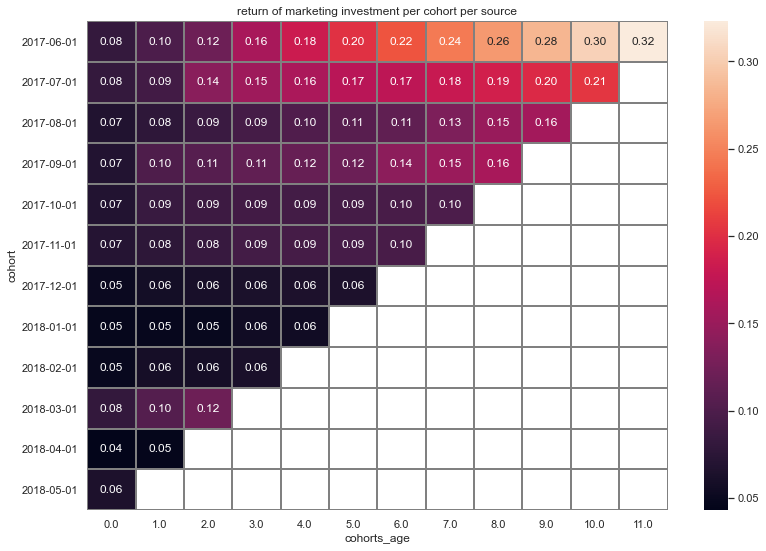

In [121]:
    
    print("return of marketing investment of source 1")

    source_heat(ls1)


    

return of marketing investment of source 2


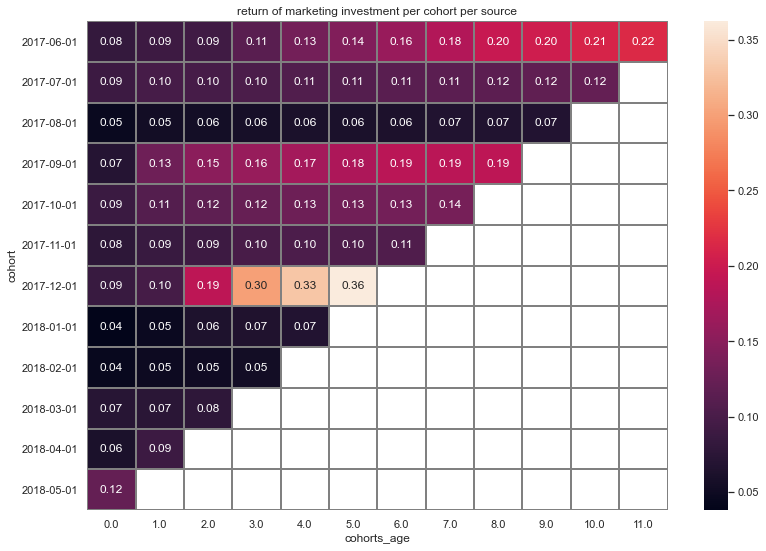

In [122]:
    
    print("return of marketing investment of source 2")

    source_heat(ls2)


    

return of marketing investment of source 3


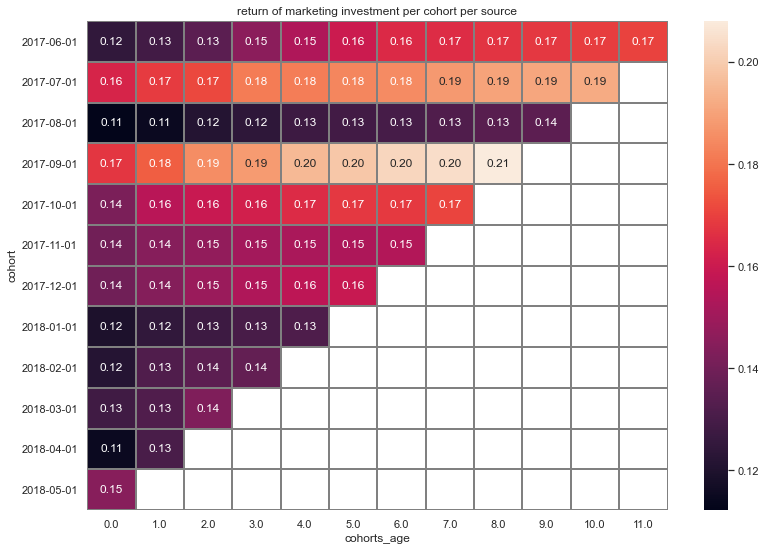

In [123]:
    
    print("return of marketing investment of source 3")

    source_heat(ls3)


    

return of marketing investment of source 4


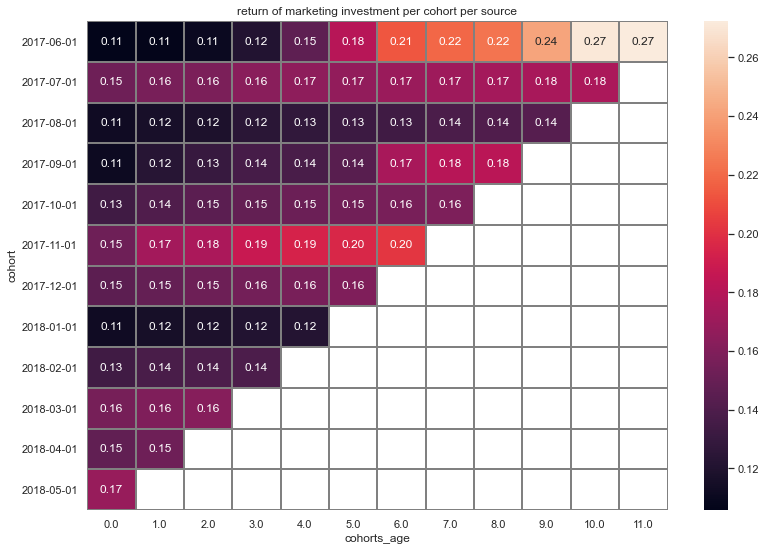

In [124]:
    
    print("return of marketing investment of source 4")

    source_heat(ls4)


    

return of marketing investment of source 5


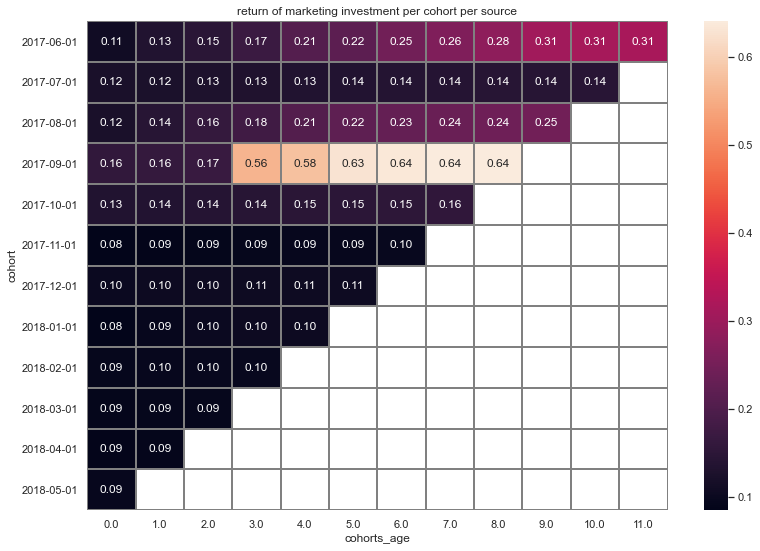

In [125]:
    
    print("return of marketing investment of source 5")

    source_heat(ls5)


    

return of marketing investment of source 9


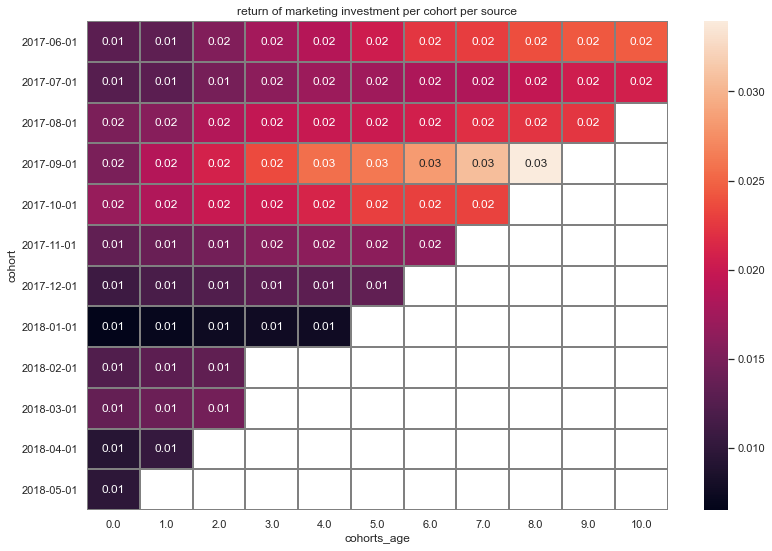

In [126]:
    
    print("return of marketing investment of source 9")

    source_heat(ls9)


    

return of marketing investment of source 10


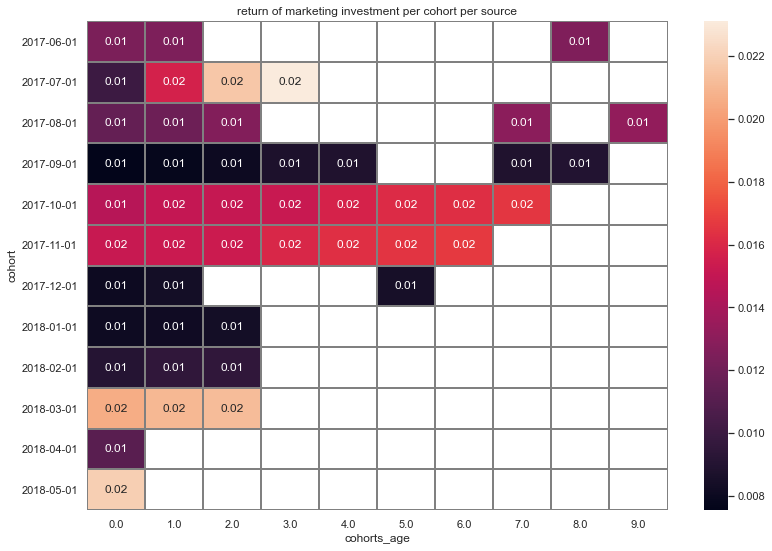

In [127]:
    
    print("return of marketing investment of source 10")

    source_heat(ls10)


    

Next, i want to see the ROMI per cohort

In [128]:
#merging the cac per month df with ltv_cohort df in order to calculate romi
cac_per_month_roi = cac_per_month[['cost_month','cac']]
cac_per_month_roi.columns = ['cohort','cac']
roi = ltv_cohort.merge(cac_per_month_roi,on = 'cohort',how = 'left')
roi

,cohort,purchase_month,revenue,number_of_users,cohorts_age,ltv,cac
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091
...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559,8.608907
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597,9.793225
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599,9.793225
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562,7.437841


In [129]:
#calculating romi 
roi['romi'] = roi['ltv'] / roi['cac']
roi_pivot = roi.pivot_table(index = 'cohort',
                          columns = 'cohorts_age',
                           values = 'romi',
                            aggfunc ='mean'
).cumsum(axis =1).round(2)

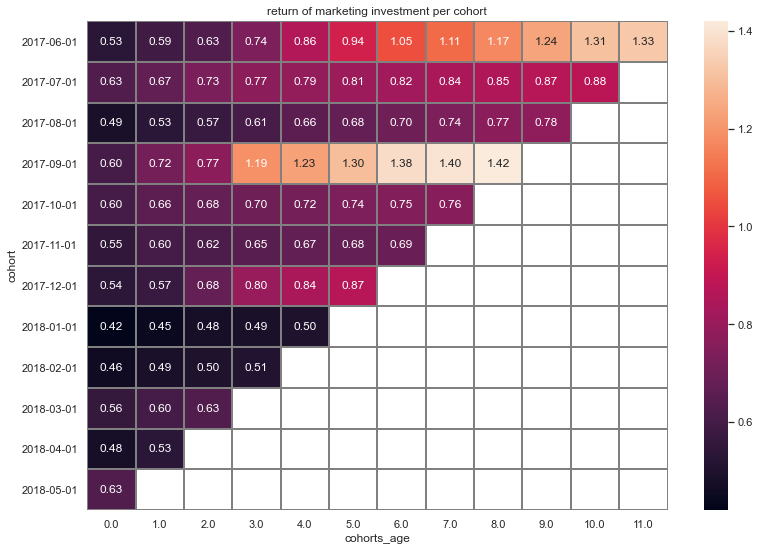

In [130]:
#Visualising the data 

roi_pivot.index = roi_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(roi_pivot, 
            annot=True, 
              fmt='.2f',
       linewidths=1, 
        linecolor='grey').set(title = "return of marketing investment per cohort") 
plt.show()
                                          

# Conclusions

In this project, my task was to help optimize marketing expenses.
In order to do that, i did the following:
1. I explored the data.
2. I prepared the data - fixed problems like columns names, added necessary columns, and fixed data types.
3. I Made reports and calculate metrics in order to make assumptions what can optimize marketing expenses.
4. I visualised the data and made calculations for different devices, marketing sources and monthly cohorts

My recommendations are:
    
1. As we can see from the retention rate heat map above, the retentio rate is in a continuous drop from cohort to cohort at the same age, so i would recomend to see what changed over time and from the first cohort to the last cohort in terms of business descisions, marketing and user interface. 

2. We can see that in almost every cohort, desktop users have a better retention rate.
I would recommaend to check what are differences between the two regarding user interface and marketing decisions. 

3. Regarding marketing sources :
* The most profitable source is source 1. It has a relativly low CAC and the highest ROMI. i would recommend to invest more money in that source and study why it is much more profitable than other sources.
* Source 3 gets too much marketing budgets, it has the highest CAC and lowest ROMi, it would be better to spend that     money on other sources or make some adaptations to make it more profitable.
* The rest of the sources seems ok, i would recommend to see what happens with source 10, what can be done to give it the little push in order to make its ROMI like the other sources.
 
4. Cohorts 09.17 and 12.17 have two very important users: users 5539673724080479777 and 11149926373378902217. Those users made a lot of big orders compared to other users, wich made their cohort numbers go up in all of the calculations. I would recommend to check how these users were atracted, who those users are and what are their online habbits, in order to try and atract similar users
 